# Homework 3: Exploratory Data Analysis

*In this homework, you are going to perform exploratory data analysis (EDA) on a dataset compiled by a research group from Harvard University.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw3`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed on the notebook.**

4. When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:

  - Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
  - Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to your TAs and LAs.

---



## Income Segregation by Education Level

In 2017, Chetty et al. compiled an anonymous data from USA Federal Government, in which they recorded the earnings of students born between 1980 and 1990 in their thirties. In addition, they recorded the earnings of their parents as well. In their study, they analyze the future financial status of students coming from different parental income levels and display how colleges help students progress.

More information and the paper itself can be obtained from here: https://opportunityinsights.org/paper/undermatching/

In this homework, you are going to analyze the dataset compiled in this study, `mrc_table3.csv`. In addition to the dataset, we also shared a PDF document, named `Codebook-MRC-Table-3.pdf`, prepared by the research team as the data dictionary that displays the columns and their explanations.

The dataset is indexed by `cohorts`. In this context, a cohort is a group of students of the same age and college. In the image below a snippet from the dataset can be observed. Although `cohort` is a column name for the students' age; the actual cohort can be conceptualized as of age + college. For instance, the first row in the image below captures the attributes of the students born in 1980 and attended Brown University.

![](https://i.ibb.co/cbvSpL5/gg.png)

As stated above, the dataset stores the estimated financial status of the students in their 30s and their parents. In addition to storing mean income values to represent financial status, such as `par_mean` and `k_mean`, the researchers also provide a set of attributes to capture the relative information. To this end, they utilize *quintiles* and *percentiles* to represent fractions of the cohort.

Below, you may find some of the column patterns that utilize quintiles and percentiles, along with their explanations.

- **par_q[PARQUINT]**: Fraction of parents in income quintile [PARQUINT]. 1 is the bottom quintile and 5 is the top.
  - Remember that each row stores the financial status of that cohort's students and their families financial attributes. The value in this attribute captures the fraction of parents that reside in the [PARQUINT] quintile. 
  - Since, with quintiles we basically divide the data into 5 different regions, [PARQUINT] can take values between 1 and 5. 
    - 1 -> bottom quintile, in other words, lowest income level
    - 5 -> top quintile, or the highest income level
  - *So, there are five columns that store the fraction of parents in that quintile, e.g. `par_q5` stores the percentage of the parents that are in the top quintile.*

- **k_top[PCTILE]pc**: Fraction of students in the top [PCTILE] percentile. For instance, `top1pc` refers to children in the top 1% of the income
distribution. 
  - The columns that contains the [PCTILE] tag captures the fractions with respect to `percentiles`.
  - As stated in the these attributes store the percentage of students that reside in the top [PCTILE]% of the income.
    - *e.g. If `k_top1pc` is set to 0.56, then we can conclude that 56% of the students in that cohort are in the top 1% of the income distribution in their 30s.*

And lastly, the researchers provide conditional probabilities as a financial projection for the students.

- **ktop1pc_cond_parq[PARQUINT]**: Probability of student in top 1%, conditional on parent in quintile [PARQUINT].
  - *e.g. ktop1pc_cond_parq1 stores the probability of a student being in the top 1% income level given that his/her parents were in the bottom quintile.*

- **kq[KIDQUINT]_cond_parq[PARQUINT]**: Probability of kid in quintile [KIDQUINT], conditional on parent in quintile [PARQUINT].
  - *e.g. kq5_cond_parq1 stores the probability of a student being in the top income quintile given that his/her parents were in the bottom quintile.*

*p.s. In this notebook, the terms `students`, `child` and `children` are used interchangeably. Each usage refers to a cohort.* 





In [1]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import matplotlib.ticker as mtick
from scipy.stats import iqr
import seaborn as sns
%matplotlib inline

In [3]:
fname = "mrc_table3.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head()

,super_opeid,cohort,name,type,tier,tier_name,iclevel,region,state,cz,czname,cfips,county,multi,count,female,k_married,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,par_top10pc,par_top5pc,par_top1pc,par_toppt1pc,k_rank,k_mean,k_median,k_median_nozero,k_0inc,k_q1,k_q2,k_q3,k_q4,k_q5,k_top10pc,...,k_rank_cond_parq1,k_rank_cond_parq2,k_rank_cond_parq3,k_rank_cond_parq4,k_rank_cond_parq5,kq1_cond_parq1,kq2_cond_parq1,kq3_cond_parq1,kq4_cond_parq1,kq5_cond_parq1,kq1_cond_parq2,kq2_cond_parq2,kq3_cond_parq2,kq4_cond_parq2,kq5_cond_parq2,kq1_cond_parq3,kq2_cond_parq3,kq3_cond_parq3,kq4_cond_parq3,kq5_cond_parq3,kq1_cond_parq4,kq2_cond_parq4,kq3_cond_parq4,kq4_cond_parq4,kq5_cond_parq4,kq1_cond_parq5,kq2_cond_parq5,kq3_cond_parq5,kq4_cond_parq5,kq5_cond_parq5,ktop1pc_cond_parq1,ktop1pc_cond_parq2,ktop1pc_cond_parq3,ktop1pc_cond_parq4,ktop1pc_cond_parq5,k_married_cond_parq1,k_married_cond_parq2,k_married_cond_parq3,k_married_cond_parq4,k_married_cond_parq5
0,30955,1980,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,19400.0,New York,36047.0,Kings,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30955,1981,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,19400.0,New York,36047.0,Kings,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30955,1982,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,19400.0,New York,36047.0,Kings,0.0,204.0,0.823529,0.127817,31523.208984,26700.0,0.250167,0.421621,0.406191,0.142148,0.024801,0.005238,0.005238,0.005238,0.0,0.0,0.438739,24056.255859,19900.0,24900.0,0.176750,0.200431,0.250120,0.279495,0.181594,0.088359,0.046438,...,0.428024,0.440198,0.427467,0.677506,0.363484,0.162332,0.348392,0.267866,0.140151,0.081259,0.253093,0.156885,0.313079,0.205283,0.071659,0.204204,0.241284,0.241138,0.205641,0.107734,0.006330,0.000000,0.204797,0.398681,0.390191,0.000000,0.994158,0.005842,0.000000,0.000000,0.000021,0.000000,0.000049,0.000000,0.0,0.117179,0.157029,0.102908,0.000000,0.000000
3,30955,1983,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,19400.0,New York,36047.0,Kings,0.0,249.0,0.791165,0.154232,32282.318359,26400.0,0.269650,0.454990,0.280893,0.173309,0.071330,0.019477,0.013392,0.006859,0.0,0.0,0.428986,22310.851562,17800.0,21600.0,0.144525,0.157278,0.340574,0.245964,0.205324,0.050860,0.028139,...,0.385405,0.458118,0.488325,0.417572,0.540677,0.195737,0.362566,0.247470,0.177454,0.016772,0.113943,0.352989,0.260903,0.171812,0.100353,0.164342,0.229867,0.256357,0.303744,0.045690,0.102705,0.456258,0.109659,0.271996,0.059382,0.020825,0.209185,0.402023,0.219770,0.148197,0.000000,0.014382,0.000000,0.000205,0.0,0.143647,0.183957,0.124883,0.162552,0.203495
4,30955,1984,ASA Institute Of Business & Computer Technology,3.0,11,Two-year for-profit,2.0,1.0,NY,19400.0,New York,36047.0,Kings,0.0,372.0,0.790323,0.147511,28149.750000,24700.0,0.244345,0.465274,0.361541,0.114497,0.038894,0.019794,0.000000,0.000000,0.0,0.0,0.436851,21684.103516,19100.0,24600.0,0.157919,0.185956,0.286461,0.242348,0.227118,0.058117,0.021588,...,0.423771,0.460235,0.430266,0.438433,0.352161,0.219620,0.278614,0.225299,0.224586,0.051881,0.137178,0.312985,0.239996,0.242708,0.067133,0.222903,0.214792,0.349489,0.164820,0.047996,0.083726,0.270829,0.276094,0.344032,0.025318,0.272786,0.431723,0.000000,0.132494,0.162998,0.000000,0.000215,0.000041,0.000000,0.0,0.130843,0.179817,0.113638,0.134755,0.170238


## Get to Know the Dataset

In this section, you are going to display the distribution of some attributes to better understand the data you are dealing with.

### Q1: NaN Values

In this notebook, we are not interested in all of the attributes. From the non-financial attributes, we are only interested in the `cohort`, `name`, `tier_name` and `type` columns. You need to make sure that there is no NaN value in these columns. And for the financial attributes we're interested in the all of the columns begining with `par_mean` (index 17 in the columns) till the end.

1. Check and print the NaN distributions in `cohort`, `name`, `tier_name` and `type` columns. If there are any NaN values in those columns, remove the corresponding rows.
2. Directly remove the rows where at least one NaN value exists in the financial attributes. *Notice that the columns starting from index 17 till the end are all financial attributes.*


In [5]:
# NaN values in part 1

print('cohort: {}'.format(df['cohort'].isnull().sum()),
      '\nname: {}'.format(df['name'].isnull().sum()),
      '\ntier_name: {}'.format(df['tier_name'].isnull().sum()),
      '\ntype: {}'.format(df['type'].isnull().sum()))

df = df.dropna(subset =['type'], axis=0 ) # 24 rows with NaN val in 'type' removed

cohort: 0 
name: 0 
tier_name: 0 
type: 0


In [7]:
pd.set_option('display.max_rows',1000) # in order to show all the financial cols
df_c = df.copy()
df_c = df[pd.notnull(df['k_married_cond_parq5'])] 
df_c.iloc[:,17:].isnull().sum()

par_mean                0
par_median              0
par_rank                0
par_q1                  0
par_q2                  0
par_q3                  0
par_q4                  0
par_q5                  0
par_top10pc             0
par_top5pc              0
par_top1pc              0
par_toppt1pc            0
k_rank                  0
k_mean                  0
k_median                0
k_median_nozero         0
k_0inc                  0
k_q1                    0
k_q2                    0
k_q3                    0
k_q4                    0
k_q5                    0
k_top10pc               0
k_top5pc                0
k_top1pc                0
k_rank_cond_parq1       0
k_rank_cond_parq2       0
k_rank_cond_parq3       0
k_rank_cond_parq4       0
k_rank_cond_parq5       0
kq1_cond_parq1          0
kq2_cond_parq1          0
kq3_cond_parq1          0
kq4_cond_parq1          0
kq5_cond_parq1          0
kq1_cond_parq2          0
kq2_cond_parq2          0
kq3_cond_parq2          0
kq4_cond_par

### Q2: College Tier Distribution

In the dataset, colleges are categorized into types and tiers at differing granularities. In the `type` column, the colleges are categorized as `public`, `private non-profit` and `for-profit`.

Find the number of colleges in each type and display their percentages as a bar chart. 

The result should look like the figure below.

![](https://i.ibb.co/2gSJCQ6/q1-1.png)

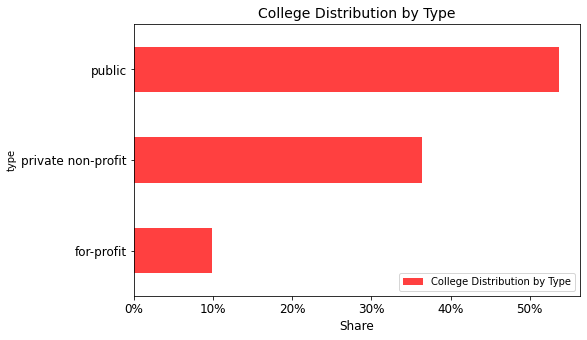

In [8]:
public = 0
private = 0
profit = 0
for i in df_c['type']:
  if i == 3:
    profit += 1
  elif i == 2:
    private += 1
  elif i == 1:
    public +=1 
sum = profit + private + public
Rpublic = public / sum * 100
Rprivate = private / sum * 100
Rprofit = profit / sum * 100

collegeTier = pd.DataFrame( {'type': ['for-profit', 'private non-profit', 'public'],'College Distribution by Type': [Rprofit,Rprivate,Rpublic] })
ax = collegeTier.plot.barh(x = 'type', y = 'College Distribution by Type' ,alpha = 0.75 ,color = 'red', figsize=(8,5), fontsize = 12)
plt.title('College Distribution by Type', fontsize = 14)
ax.set_xlabel('Share', fontsize = 12)
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

### Q3: Student & Parent Income Distribution

Columns `par_mean` and `k_mean` store the mean income for the parents and students in a cohort. In order to understand the overall distribution, display the `par_mean` and `k_mean` attributes as boxplots on the same figure.

However, the mean distributions are highly skewed. So, in order to better evaluate the distributions, we can remove the outliers. 

- Create a 2x1 grid layout. Display the boxplots of the original distributions on the left. 

- Remove the outliers from both of the distributions by utilizing 1.5xIQR rule.

- Generate the boxplots for the resulting distributions on the right axes. 

The result should look like the figure below.

![](https://i.ibb.co/YkSzc9d/q2.png)

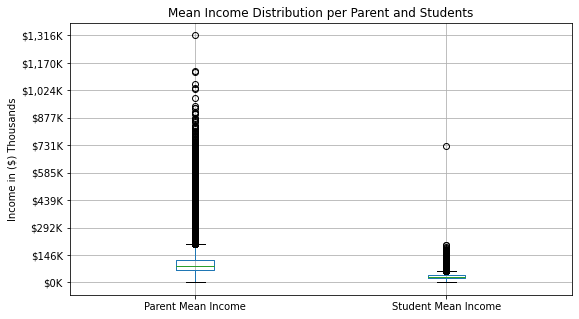

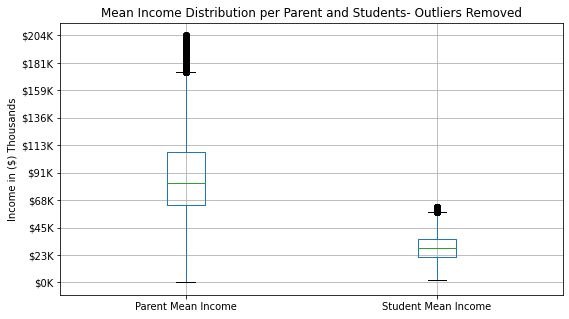

In [9]:
mean_income = pd.DataFrame({'Parent Mean Income':df_c['par_mean'] /1000,'Student Mean Income': df_c['k_mean']/1000})

boxplot = mean_income.boxplot(column=['Parent Mean Income','Student Mean Income'],figsize=(9,5))

boxplot.set_title('Mean Income Distribution per Parent and Students')
boxplot.set_yticks(np.arange(0,mean_income.max().max() , 146.24))
boxplot.set_ylabel('Income in ($) Thousands')
boxplot.grid(True)

fmt = '${x:,.0f}K'
tick = mtick.StrMethodFormatter(fmt)
boxplot.yaxis.set_major_formatter(tick)
plt.show()

Q1 = mean_income.quantile(0.25)
Q3 = mean_income.quantile(0.75)
IQR = Q3 - Q1


outliers = mean_income[~((mean_income < (Q1 - 1.5 * IQR)) |(mean_income > (Q3 + 1.5 * IQR))).any(axis = 1)] 


boxplot2 = outliers.boxplot(column=['Parent Mean Income','Student Mean Income'],figsize=(9,5))
boxplot2.set_title('Mean Income Distribution per Parent and Students- Outliers Removed')
boxplot2.set_yticks(np.arange(0,outliers.max().max() , 22.65))
boxplot2.set_ylabel('Income in ($) Thousands')
boxplot2.grid(True)

fmt = '${x:,.0f}K'
tick = mtick.StrMethodFormatter(fmt)
boxplot2.yaxis.set_major_formatter(tick)


plt.show()


## Bivariate Analysis

In this section,  you are going to perform bivariate analysis on different attribute pairs.

### Q1: Parent Income Distribution by College Tier

The income distribution is highly skewed as it can be observed in the previous question. With the generated charts, we see how the overall distribution is shaped with the help of boxplots. However, we can not observe how this distribution changes with respect to college tiers.

As you can see from the shared data dictionary, there are 14 different college types. Instead of putting all of the tiers into account, in this question, you are going to focus on 6 of them: `Ivy Plus, Other elite schools (public and private), Highly selective public, Highly selective private, Selective public, Selective private`. Display the `par_mean` distribution for each of the selected tiers.

- Group the dataframe with respect to the selected tier types.
- For each group, display the `par_mean` attribute on the same figure as a boxplot.
- Sort the boxplots with respect to their medians.

The result should look like the figure below.

![](https://iili.io/FMJMn1.png)


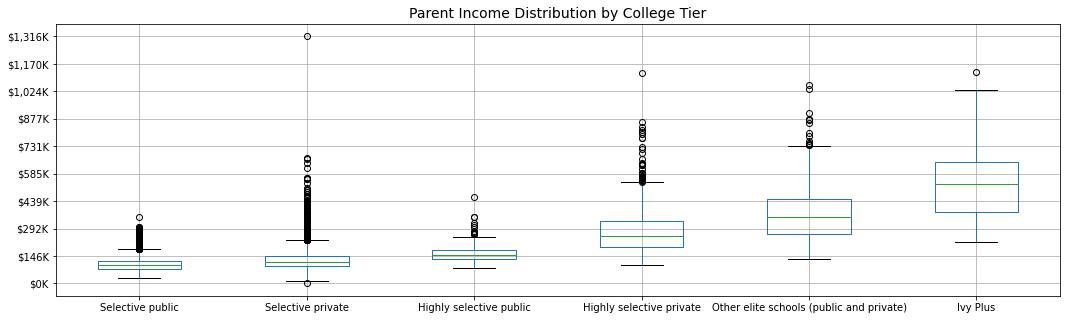

In [10]:
df_x = df_c.copy()
colleges = df_x.loc[(df_x['tier_name'] == "Selective public") | (df_x['tier_name'] == "Selective private") |
                    (df_x['tier_name'] == "Highly selective public") | (df_x['tier_name'] == "Highly selective private")| 
                     (df_x['tier_name'] == "Ivy Plus") | (df_x['tier_name'] == "Other elite schools (public and private)")]
colleges = colleges[['tier_name','par_mean']]
colleges['par_mean'] = colleges['par_mean'] / 1000
grouped  = colleges.groupby(['tier_name'])
df_grp = pd.DataFrame({col:val['par_mean'] for col,val in grouped})
meds = df_grp.median()
meds.sort_values(ascending=True, inplace=True)
df_grp = df_grp[meds.index]
multiBox= df_grp.boxplot(figsize=(18,5))
multiBox.set_title('Parent Income Distribution by College Tier', fontsize = 14)
multiBox.set_yticks(np.arange(0,mean_income.max().max() , 146.24))
fmt = '${x:,.0f}K'
tick = mtick.StrMethodFormatter(fmt)
multiBox.yaxis.set_major_formatter(tick)
plt.show()

### Q2: Mean Child Rank vs. Age at Income Measurement by College Tier

In this question, you are going to display how the mean student income rank changes as the age of income measurement changes for the selected college tiers. In the dataset, we have students born between 1980 and 1991. In **2014**, their income level is measured. In the dataset, the `k_rank` column stores the student income rank.

- First, find the age of each cohort by subtracting the birth years from the year of measurement and store them in a new column named `measurement_age`.

- Group the dataframe by `tier_name` and `age`, and find the mean student income rank for each group.

- For the listed tier names below, display the change of mean student income rank with respect to the age of measurement as a line chart.

`Ivy Plus, Other elite schools (public and private), Highly selective public, Highly selective private, Selective public, Selective private`

The result should look like the figure below.

![](https://i.ibb.co/FJFZHX6/dd-3.png)

*Hint: You may use the unstack function alongise transposition.*

*Please visit the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) for the details on unstack, and [this link](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/) for the use cases.*



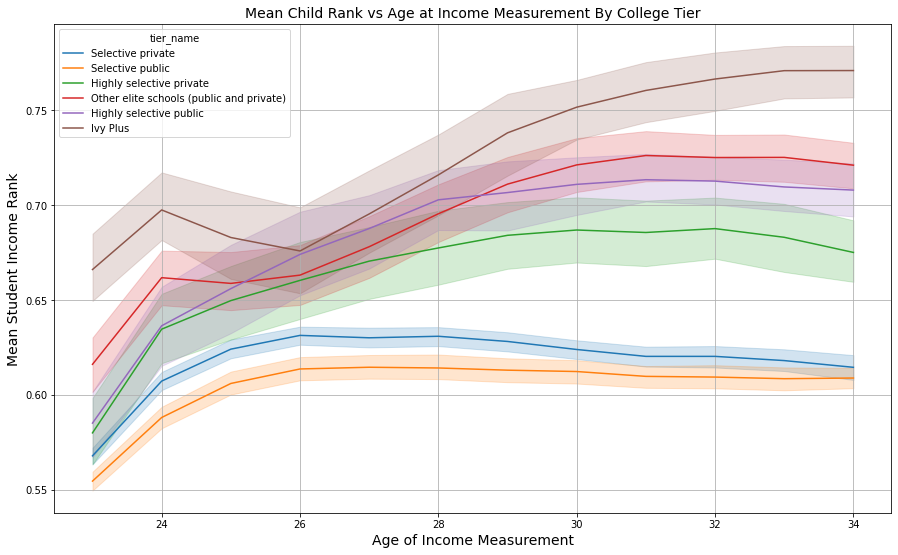

In [11]:
df_krank = df_c.copy()
age = []
for i in df_krank.itertuples():
  age.append(2014-int(i[2]))
df_krank['measurement_age'] = age
colleges = df_krank.loc[(df_krank['tier_name'] == "Selective public") | (df_krank['tier_name'] == "Selective private") |
                    (df_krank['tier_name'] == "Highly selective public") | (df_krank['tier_name'] == "Highly selective private")| 
                     (df_krank['tier_name'] == "Ivy Plus") | (df_krank['tier_name'] == "Other elite schools (public and private)")]
colleges = colleges[['tier_name','k_rank','measurement_age']]


plt.figure(figsize=(15,9))
plt.grid()
plt.xlabel('Age of Income Measurement',size = 14)
plt.ylabel('Mean Student Income Rank',size = 14)
plt.title('Mean Child Rank vs Age at Income Measurement By College Tier',fontsize=14)
sns.lineplot(x = 'measurement_age', y ='k_rank', hue = 'tier_name', data = colleges)



## Mobility Rate

The researchers analyzed the role of colleges for students to progress their income level, especially the students coming from lower quintiles that end up in higher quintiles in their adulthoods. To this end, they derive a new metric named `mobility rate`. 

> "The fraction of students who come from bottom quintile and end up in top quintile"

![](https://i.ibb.co/rpTgXq0/pl.png)

In the dataset `kq5_cond_parq1` column stores the success rate of each cohort; while `par_q1` column stores the access rates.

In addition to defining the success rate as P(Child in Q5 | Parent in Q1), the researchers also developed the same rate with respect to student income percentiles: P(Child in **P1** | Parent in Q1) stands for the students who come from bottom quintile and end up in top 1% percentile.  And `ktop1pc_cond_parq1` column stores those values for each cohort.

### Q1: Calculating the Mobility Rate

In this question, you are going to calculate the mobility rate for each college and then find the top 10 colleges with the highest mobility rates.

- For each cohort, in other words each row, calculate the mobility rate with both `kq5_cond_parq1` and `ktop1pc_cond_parq1` and store them in columns named `mobility_rate_q5` and `mobility_rate_p1`, respectively.
  - `kq5_cond_parq1` * `par_q1` -> `mobility_rate_q5`
  - `ktop1pc_cond_parq1` * `par_q1` -> `mobility_rate_p1`

- Group the dataframe with respect to the colleges and find the mean of `mobility_rate_q5, mobility_rate_p1, kq5_cond_parq1, par_q1` columns. 

- First, sort the resulting groups, i.e. colleges, with respect to `mobility_rate_q5` and display the top 10 rows as a dataframe.

- And lastly, sort the resulting groups with respect to `mobility_rate_p1` and display the top 10 rows as a dataframe.

In [14]:
dfNew = df_c.copy()
dfNew['mobility_rate_q5'] = dfNew['kq5_cond_parq1'] * dfNew['par_q1'] 
dfNew['mobility_rate_p1'] = dfNew['ktop1pc_cond_parq1'] *  dfNew['par_q1']


In [15]:
df1 = dfNew.copy()
df1 = df1.groupby('name').mean()[['mobility_rate_q5','mobility_rate_p1','kq5_cond_parq1','par_q1']]
df1 = df1.sort_values(by = ['mobility_rate_q5'], ascending=False).head(10)
df1.head(10)


,mobility_rate_q5,mobility_rate_p1,kq5_cond_parq1,par_q1
name,,,,
Vaughn College Of Aeronautics And Technology,0.117558,0.002870,0.357309,0.323289
CUNY Bernard M. Baruch College,0.117403,0.007083,0.450410,0.256923
CUNY Lehman College,0.087978,0.001021,0.255732,0.342567
City College Of New York - CUNY,0.087722,0.003299,0.288997,0.296387
Texas A&M International University,0.078556,0.000806,0.268974,0.291105
University Of Texas - Pan American,0.076030,0.002675,0.220468,0.345399
CUNY John Jay College Of Criminal Justice,0.075464,0.000800,0.290769,0.257754
Florida National University,0.074975,0.001441,0.144384,0.530089
Crimson Technical College,0.072232,0.002275,0.291655,0.248937


In [16]:
df2 = dfNew.copy()
df2 = df2.groupby('name').mean()[['mobility_rate_q5','mobility_rate_p1','kq5_cond_parq1','par_q1']]
df2 = df2.sort_values(by = ['mobility_rate_p1'], ascending=False).head(10)
df2.head(10)

,mobility_rate_q5,mobility_rate_p1,kq5_cond_parq1,par_q1
name,,,,
South Texas Vocational Technical Institute,0.052845,0.011787,0.079329,0.678088
MCPHS University,0.053137,0.011090,0.647694,0.080610
Maine Maritime Academy,0.031081,0.010220,0.553291,0.055043
Massachusetts Institute Of Technology,0.030623,0.009822,0.606782,0.050916
California Institute Of Technology,0.025567,0.008356,0.584225,0.044338
Uta Mesivta Of Kiryas Joel,0.057186,0.008284,0.107940,0.521503
Saint Louis College Of Pharmacy,0.020882,0.008196,0.610534,0.031245
Digipen Institute Of Technology,0.022640,0.008002,0.477062,0.047609
Southwest University At El Paso,0.034466,0.007532,0.075927,0.469441


### Q2: Success vs. Access Rates by College Tier

And finally, you are going to check how success and access rates change for different college tiers. In this question, you are going to focus on two college tiers: `Ivy Plus` and `Two-year for-profit`. In addition, you are going to display this relationship using only the success rate definition 2: P(Child in P1 | Parent in Q1).

- Group the dataframe by college and find the mean of success and access rates for each college.
  - Success rate: 
    - Definition 2: P(Child in P1 | Par in Q1) -> ktop1pc_cond_parq1
  - Access rate: P(Par in Q1) -> par_q1

- Display a scatter plot in which access rates are encoded in x-axis and success rates in y-axis.

- At the end, each dot on the figure would represent a college. Highlight `Ivy Plus` and `Two-year for-profit` with distinct color for separability.

The result should look like the figure below.

![](https://iili.io/FMJ6cG.png)

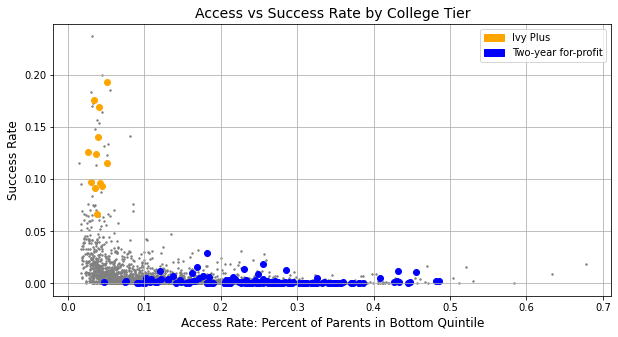

In [34]:
dfX = dfNew.copy()

ivyPlus = dfX.loc[dfX['tier_name'] == 'Ivy Plus']
ivyPlus = ivyPlus.groupby(['name'])
twoYear = dfX.loc[dfX['tier_name'] == 'Two-year for-profit']
twoYear = twoYear.groupby(['name'])
dfX = dfX.groupby('name')

successAll = dfX['ktop1pc_cond_parq1'].mean()
accessAll = dfX['par_q1'].mean()

ivySucess = ivyPlus['ktop1pc_cond_parq1'].mean()
ivyAccess = ivyPlus['par_q1'].mean()

twoSuccess = twoYear['ktop1pc_cond_parq1'].mean()
twoAccess = twoYear['par_q1'].mean()


plt.figure(figsize= (10,5))
plt.grid()

plt.scatter(accessAll, successAll, c = 'gray', s = 2)
plt.scatter(ivyAccess, ivySucess, c = 'orange')
plt.scatter(twoAccess, twoSuccess, c = 'blue')


sns.scatterplot().set_xlabel('Access Rate: Percent of Parents in Bottom Quintile', fontsize = 12)
sns.scatterplot().set_ylabel('Success Rate',fontsize = 12)
plt.title('Access vs Success Rate by College Tier',fontsize= 14)
import matplotlib.patches as mpatch
orangePatch = mpatch.Patch(color = "orange",label = "Ivy Plus")
bluePatch = mpatch.Patch(color = "blue",label = "Two-year for-profit")
plt.legend(handles =[orangePatch,bluePatch])
plt.show()